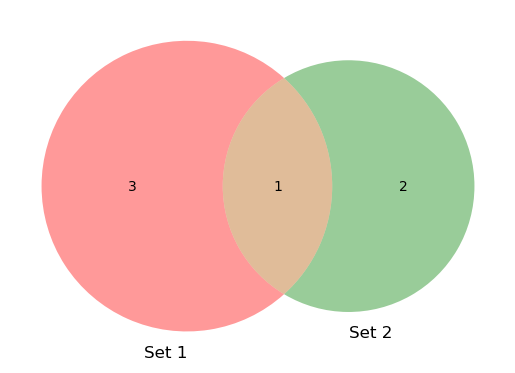

In [4]:
from matplotlib import pyplot as plt
from matplotlib_venn import venn2

# 创建两个集合
set1 = set(['A', 'B', 'C', 'D'])
set2 = set(['D', 'E', 'F'])

# 绘制韦恩图
venn2([set1, set2], set_labels=('Set 1', 'Set 2'))

# 显示图形
plt.show()

In [1]:
import pandas as pd

# 读取数据
df = pd.read_csv("output.txt", sep='\t')

# 分别计算 DP、AF、SB 的平均值
columns = ["AF", "SB"]
results = {}
for i, col in enumerate(columns):
    df_col = df.dropna(subset=[col])[["Position", col]]
    df_col[col] = df_col[col].astype(float)
    result = df_col.groupby(by=["Position"], as_index=False).max(numeric_only=True)
    result = result[result[col] != 0]  # 只保留非零值
    results[f"df_err_v{i+1}"] = result
    

# 返回结果
df_err_v1 = results["df_err_v1"]
df_err_v2 = results["df_err_v2"]

# 创建一个新的索引
new_index = pd.RangeIndex(start=1, stop=29903, step=1)

# 重新索引数据框
df_err_v1 = df_err_v1.set_index('Position').reindex(new_index, fill_value=0).reset_index(drop=False).rename(columns={'index': 'Position'})
df_err_v2 = df_err_v2.set_index('Position').reindex(new_index, fill_value=0).reset_index(drop=False).rename(columns={'index': 'Position'})


In [29]:
print(df_err_v1.head())
print("==================")
print(df_err_v2.head())

   Position   AF
0         1  0.0
1         2  0.0
2         3  0.0
3         4  0.0
4         5  0.0
   Position   SB
0         1  0.0
1         2  0.0
2         3  0.0
3         4  0.0
4         5  0.0


In [3]:
pd.read_csv("/homes/zihao/EBI_INTER/P1_Coverage/processed_data.txt", sep='\t')[['Position','MEAN_err']]

,Position,MEAN_err
0,28221,2.80685618729097
1,4,0.0
2,29868,0.0
3,26,0.5666041275797373
4,20441,0.20075046904315197
...,...,...
20814,24390,None
20815,29865,None
20816,43,None
20817,1211,None


In [14]:
df_err = pd.read_csv("/homes/zihao/EBI_INTER/P1_Coverage/processed_data.txt", sep='\t')[['Position','MEAN_err']]
# 使用loc和布尔索引筛选出满足条件的行，然后删除该列
df = df_err[df_err['Position'].astype(int) <= 29903]

df["MEAN_err"] = pd.to_numeric(df_err['MEAN_err'], errors='coerce')
df_err = df.groupby(by=["Position"], as_index=False).mean(numeric_only=True)

# 重新索引数据框
df_err = df_err.set_index('Position').reindex(new_index, fill_value=0).reset_index(drop=False).rename(columns={'index': 'Position'})

df_err.head()

,Position,MEAN_err
0,1,0.000000
1,2,0.000000
2,3,0.004951
3,4,0.010309
4,5,0.000376


## Tips 
SB>0, and/or a very low coverage (for example a coverage ratio<0.1), and/or an AF>0.01 .

In [16]:
# 将'MEAN_err'列转换为浮点数
df_err['MEAN_err'] = pd.to_numeric(df_err['MEAN_err'], errors='coerce')

# 将NaN值替换为0
df_err['MEAN_err'] = df_err['MEAN_err'].fillna(0)

# 将'MEAN_err'列与0.1进行比较
df_err['Flag'] = df_err['MEAN_err'] > 0.1

df_err.head()

,Position,MEAN_err,Flag
0,1,0.000000,False
1,2,0.000000,False
2,3,0.004951,False
3,4,0.010309,False
4,5,0.000376,False


In [17]:
# 将'MEAN_err'列与0.1进行比较
df_err_v1['Flag'] = df_err_v1['AF'] > 0.01
df_err_v1.head()

# 将'MEAN_err'列与0.1进行比较
df_err_v2['Flag'] = df_err_v2['SB'] > 0
df_err_v2.head()

,Position,SB,Flag
0,1,0.0,False
1,2,0.0,False
2,3,0.0,False
3,4,0.0,False
4,5,0.0,False


In [24]:
df_err_v1_F = set(df_err_v1[df_err_v1['Flag'] == False]['Position'])

In [31]:
SET_SB = set(df_err_v2['Flag'])

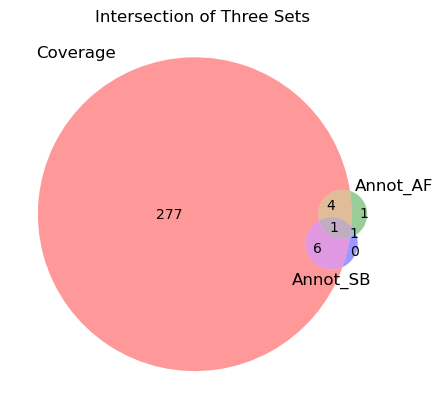

In [29]:
from matplotlib_venn import venn3
import matplotlib.pyplot as plt

# 创建数据
set1 = set(df_err[df_err['Flag'] == True]['Position'])
set2 = set(df_err_v1[df_err_v1['Flag'] == True]['Position'])
set3 = set(df_err_v2[df_err_v2['Flag'] == True]['Position'])

# 创建Venn图
venn3([set1, set2, set3], ('Coverage', 'Annot_AF', 'Annot_SB'))

# 设置图形属性
plt.title('Intersection of Three Sets')
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


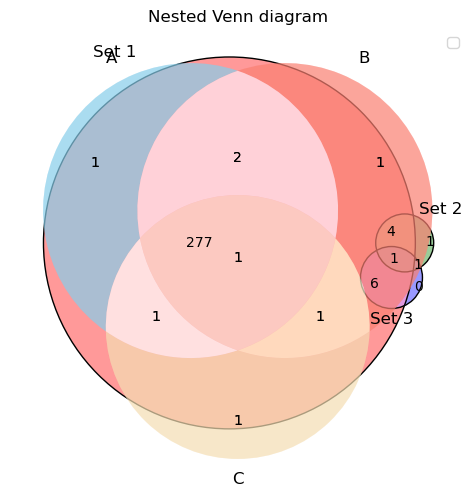

In [35]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3, venn3_circles

# 创建数据集
set1 = set(df_err[df_err['Flag'] == True]['Position'])
set2 = set(df_err_v1[df_err_v1['Flag'] == True]['Position'])
set3 = set(df_err_v2[df_err_v2['Flag'] == True]['Position'])
set4 = set(['A', 'B', 'C', 'D', 'E'])
set5 = set(['B', 'C', 'E', 'F', 'G'])
set6 = set(['C', 'D', 'G', 'H'])

# 绘制韦恩图
fig, ax = plt.subplots(figsize=(6, 6))
venn3([set1, set2, set3], ('Set 1', 'Set 2', 'Set 3'), ax=ax)
venn3_circles([set1, set2, set3], lw=1.0, ax=ax)

# 绘制内嵌韦恩图
venn3([set4, set5, set6], ('', '', ''), ax=ax, set_colors=('skyblue', 'salmon', 'wheat'))
venn3([set4, set5, set6], ax=ax, set_colors=('skyblue', 'salmon', 'wheat'), alpha=0.5)

# 设置图例和标题
plt.title('Nested Venn diagram')
plt.legend()

# 设置标签字体大小和颜色
for text in ax.collections:
    if str(text) != "Poly((0.423333, 0.3) ... ":
        text.set_fontsize(18)
        text.set_color('black')

plt.show()


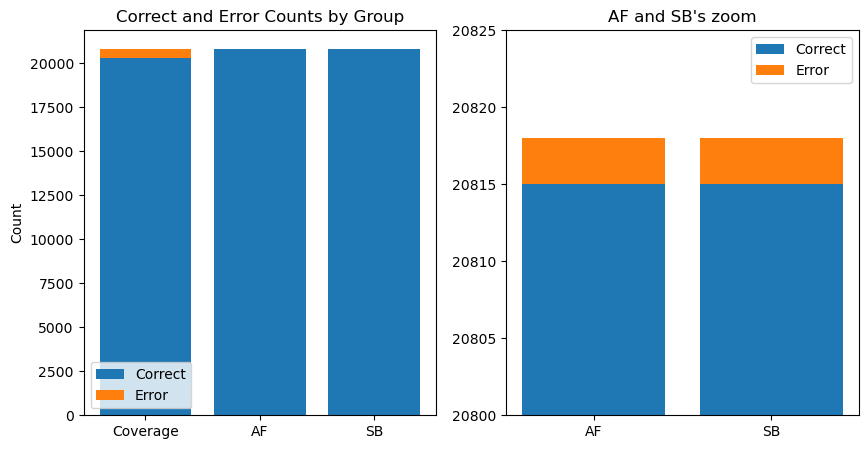

In [100]:
import matplotlib.pyplot as plt

# 创建数据
group_labels = ['Coverage', 'AF', 'SB']
error_counts = [df_err['Flag'].value_counts()[True], df_err_v1['Flag'].value_counts()[True], df_err_v2['Flag'].value_counts()[True]]
correct_counts = [df_err['Flag'].value_counts()[False], df_err_v1['Flag'].value_counts()[False], df_err_v2['Flag'].value_counts()[False]]

# 创建堆积条形图
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# 第一个子图
ax1.bar(group_labels, correct_counts, label='Correct')
ax1.bar(group_labels, error_counts, bottom=correct_counts, label='Error')
ax1.set_ylabel('Count')
ax1.set_title('Correct and Error Counts by Group')
ax1.legend()

# 第二个子图
ax2.bar(group_labels[1:], correct_counts[1:], label='Correct')
ax2.bar(group_labels[1:], error_counts[1:], bottom=correct_counts[1:], label='Error')
ax2.set_title('AF and SB\'s zoom')
ax2.set_ylim(20800, 20825)  # 只有第二个子图设置y轴范围
ax2.legend()

# 显示图形
plt.show()

